# DAQC
Based on previous works in developing ansatz of VQE for DQC, we proposed the following ansatz for VQE with hierachy layer structure and physical system interaction embedding. 
    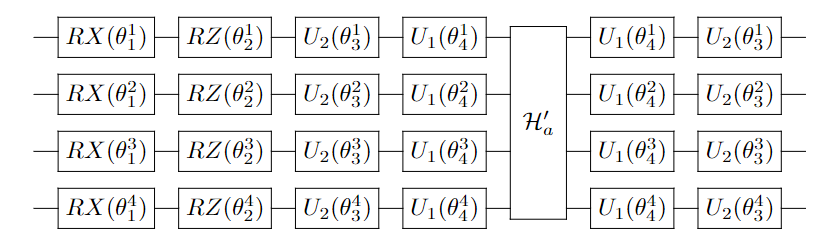

where $H_a'$ is realized by  
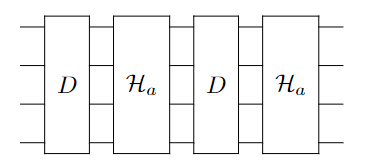
, where the decoupling layer D is determined from the problem Hamiltonian $H_e$ which we need to estimate the ground state energy. 

In general, in one layer, the ansatz consists of a local unitary part composed of one-qubit rotation gates and an entangling layer which is realized by the time-evolution of the analog Hamiltonian $H_A$.
For the local unitary part, we follow a standard approach by using a sequence of parameterized Rx and Rz gates. This gate sequence could approximate arbitrary one-qubit state.
For the entangling layer, we propose a ZX 1-D spin chain with periodic condition, which we will refer as "circular connectivity". 
\begin{equation}
    H_a = - \frac{1}{\sqrt{2}} \sum_{i} Z_i + \sum_{i} Z_i \otimes X_{i+1}
\end{equation}
We explain a few reasons why we choose $ZX$ interaction for our analog Hamiltonian. Firstly, the $ZX$ interaction allows more meaningful interaction compared to interaction such as $ZZ$. This is due to if we choose $ZZ$ as our interaction term, every terms in the analog Hamiltonian commute. This implies that the time evolution $e^{i t H_a}$ could be realized by a single generator with trivial actions on the Z-basis which is our computational basis. The anti-commutation introduced by $ZX$ allows the analog block to act as a non-trivial "mixer" of problem Hamiltonian eigenstates inspired from Quantum Approximate Optimization Algorithm (QAOA). We could also equally choosing $YX$ or $YZ$ interaction; however, we think $ZX$ interaction is easier to be implemented on the underlying physical devices (such as superconducting circuit) compared to interactions involving pauli $Y$ operator. From $ZX$ interaction, to create other interaction form such as $ZY$, we use the help of digital block. We introduce the three following operators $U_1,U_2,U_3$ defined as 
\begin{equation}
    \begin{aligned}
    & U_1(\theta) = \cos\left(\frac{\theta}{2}\right) X + \sin\left(\frac{\theta}{2}\right)Z  \\
    &  U_2(\theta) = \cos\left(\frac{\theta}{2}\right) X + \sin\left(\frac{\theta}{2}\right)Y \\
    & U_3(\theta) = \cos\left(\frac{\theta}{2}\right) Y + \sin\left(\frac{\theta}{2}\right)Z 
    \end{aligned}
\end{equation}
all of which can be defined via a general U3 gate. Their actions $X \xrightarrow{U_1} U_1 X U_1 $ are 

\begin{equation}
    \begin{aligned}
       & X \xrightarrow{U_1}  X \cos(\theta) + Z \sin(\theta) , \quad  Y \xrightarrow{U_1} - Y, \quad Z \xrightarrow{U_1} X \sin(\theta)   - Z \cos(\theta) \\
       & X \xrightarrow{U_2}  X \cos(\theta) + Y \sin(\theta) , \quad  Y \xrightarrow{U_2} X \sin(\theta) - Y \cos(\theta), \quad Z \xrightarrow{U_2} -Z \\
       & X \xrightarrow{U_3} -X , \quad  Y \xrightarrow{U_3} Y \sin(\theta) - Z \cos(\theta), \quad Z \xrightarrow{U_3} Y \cos(\theta) + Z \sin(\theta) 
    \end{aligned}
\end{equation}

Secondly, for choosing $-Z$ as our local term, we are imitating the control unitary $CU$ gate with the following pauli-basis representation 
\begin{equation}
   CU = \exp\left(i \frac{1}{2} (I-Z) \otimes H \right), \quad U = e^{i H} 
\end{equation}
Therefore, our entangling layer is similar to a sequence of $CNOT$ gates. Thirdly, by using $ZX,Z$ for circular connectivity, we can delete unwanted arbitrary interaction terms in $H_a$, which we call the decoupling rule. This flexibility allows us to embed the problem Hamiltonian $H_e$ connection map into $H_a$. For instance, if there is no nearest neighbor interaction between qubit 1 and qubit 2 in $H_e$, we expect that there should be no nearest neighbor interaction between qubit 1 and qubit 2 in $H_a$. The decoupling rule is based on the following observation 

\begin{equation}
    [ Z_2 ( Z_1 \otimes X_2 + Z_2 \otimes X_3) Z_2 ]  + Z_1 \otimes X_2 + Z_2 \otimes X_3 = 2  Z_2 \otimes X_3
\end{equation}

Hence, we can approximate time evolution of $Z_2 \otimes X_3 $ by $ Z_1 \otimes X_2 + Z_2 \otimes X_3 $ using Suzuki-Trotter formula

\begin{equation} 
    e^{i Z_2 \otimes X_3 } \approx Z_2 e^{ i ( Z_1 \otimes X_2 + Z_2 \otimes X_3)  } Z_2 e^{i( Z_1 \otimes X_2 + Z_2 \otimes X_3)}
\end{equation} 

This is the motivation behind our decoupling block $D$ appeared in the ansatz and the method to embed problem Hamiltonian $H_e$ connection map into $H_a$. 

What happen if we use three-body interaction terms. We can observe that even though we are using two-body interaction in $H_a$, we can capture many-body interaction terms by using the definition of matrix exponential

\begin{equation} 
    e^{i H_a} = I + (i H_a) + \frac{1}{2!} (i H_a)^2 + + \frac{1}{3!} (i H_a)^3 + \dots  
\end{equation}

If $H_a$ contains two-body interaction terms, to 1st order in $H_a$, $e^{i H_a} $ contains only two-body interaction terms. To 2nd order $e^{i H_a} $ already contains only three-body and four-body interaction terms. Therefore, this implies that one layer of $H_a$ with four-body interaction terms may need two layer of $H_a$ with two-body interaction terms to replicate. In explicit, if the problem Hamiltonian $H_e$ many-body interaction terms, using a single layer of our ansatz maynot be sufficient to estimate the ground state energy.
Nevertheless, we still choose to only include two-body interaction terms in our $H_a$ dues to the decoupling rule is easier to implement, and it is more transparent to understand the result given by the ansatz. To correct the error in estimated energy due to the lack of multi-qubit interactions in $H_a$, we introduce a scheme to append new layer which respects a hiearachy introduced by perturbation theory. We will explain it in more detail below. 

How does the system qubit connectivity configuration change the accuracy? Since we are using two-body interaction in $H_a$, it is clear that the correlation between two arbitray qubits should decrease for increasing distance between them. In this sense, a 1-layer 1-D chain ansatz may not be adequate in creating long-range correlation if our $H_e$ ground state has long correlation-length. Therefore, grid configuration or All-to-All configuration could provide better accuracy estimation in most cases, assuming there are corresponding decoupling rules for these configurations. For comparison between circular configuration and star-shape configuration, we suspect that they provide the same magnitude of accuracy. However, which configuration provides better accuracy depends significantly on the problem Hamiltonian $H_e$. 

To see whether this ansatz performs better than DQC ansatz, we compare out ansatz with 2 different DQC ansatz below for $H_2$ Hamiltonian and $ZZX$ spin chain with (5 qubit) (See below). 



# Connectivity mapping
In this section, we introduce a classical scheme to mitigate the disadvantage of not having an All-to-All configuration. This main idea is that the first ansatz layer should be able to capture the effect of terms which have high interaction strength, i.e 0-th term in perturbation theory. 

Given the problem Hamiltonian $H_e$, we can construct a graph $V_e$, with the qubits as vertices. If there is an edge $E_{ij}$ connecting node i and node j with weight $g_{ij} > 0 $, it indicates that there is interaction between qubit i and qubit j with interaction strength approximately $g_{ij}$.
           
   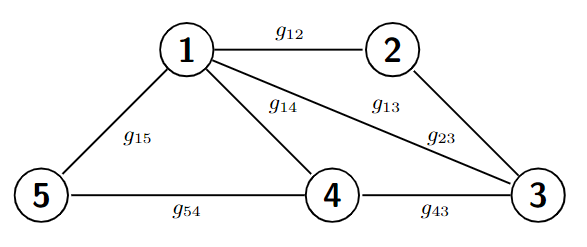

Given the configuration of the Analog Hamiltonian, we define a graph $V_a$, which we use to define the distance $d_{ij}$ between node i and node j as the shortest path between these nodes in graph $V_a$.

    
   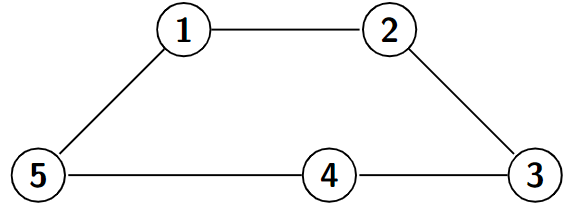
We denote $M = \{ 1,2, \dots, N\}$ the set of nodes in $V_e$ or $V_a$, i.e we are assuming $V_e$ and $V_a$ has the same number of qubit (due to the decoupling rule, we do not lose generality). Our goal is to find a bijective mapping $f: M \to M$ to minimize the following sum 

\begin{equation}
    \sum_{ij} d_{ f(i),f(j)} g_{ij}, \quad i,j \in M
\end{equation}

Intutively, the optimal mapping $f$ would map nodes with large weight to be near eachother, which is what we want since $H_a$ only support nearest neighbor interactions. Given $f$, we obtain a new Hamiltonian $f(H_e) = H_e'$ which has the same energyspectrum as $H_e$. However, $H_e'$ form is more suitable for estimating the ground state energy using our ansatz $H_a$. In fact, the estimated ground state energy given by the ansatz can be treated as 0-th order in perturbation theory. Since this optimization step is classical, we have achieved increment in accuracy without the need of increasing the complexity of the ansat. In the passing note, we remark that the above optimization is NP-hard. Nevertheless, there exists  many good heuristic methods to find a suitable mapping function $f$. For small amount of qubit, this problem can be solved by brute force. 

        
In the following paragraphs, we explain how do we assign the interaction strengths. It is natural to define the interaction strength in term of the $L_2$ matrix norm. For instance, if in $H_e$, the only interaction terms between 1 and 2 are

\begin{equation} 
    Z_1 \otimes X_2 - Y_1 \otimes Y_2 + X_1 \otimes Z_2,
\end{equation}

then we define the interaction strength $g_{12} = \frac{||Z_1 \otimes X_2 - Y_1 \otimes Y_2 + X_1 \otimes Z_2||_2}{(\sqrt{2})^2} $. The normalization constant comes from the requirement that if we only have $Z_1 \otimes Z_2$, then $g_{12}$ should equal 1. If we have many-body terms such as $3 Z_{1} \otimes X_{2} \otimes Y_{3}$, we decompose into pair-wise two-body terms 

\begin{equation} 
    3 Z_{1} \otimes X_{2} \otimes Y_{3} \to 3 Z_1 \otimes X_2  + 3 Z_1 \otimes Y_3 + 3 X_2 \otimes Y_3  
\end{equation}

and perform calculations of interaction strength as normal. Since these matrices are only $4 \times 4$, the interaction strengths can be calculated extremely fast. As a side note, there is room for improvement on how do we assign the weight $g_{ij}$ approriately. In most case, the above simple rule is sufficent. However, the above decomposing scheme for many-body terms is similar to mean-field theory in condensed matter physics. In fact, we are inspired by the mean-field theory. Hence, the above decomposing scheme could break down when the many-body terms have large coefficients.  

To illustrate this, we considering the following artificial Hamiltonian $H_e$

\begin{equation} 
        H_e  = 4(Y_1 \otimes Y_4 ) + 2(Y_1 \otimes Z_2) + 4(Y_1 \otimes Y_3) + 5(Y_2 \otimes Y_4) + (Z_2 \otimes Y_3) + 4(Y_2 \otimes X_5) + 2(X_3 \otimes X_5) + Y_4 \otimes Z + 4 (Y_1 \otimes Z_5)
\end{equation}

which has strong interaction strength between distance qubit and weak interaction strength between neighboring qubits. Therefore, we expect that performming connectivity mapping would improve the accuracy tremendously. Here, we report the true ground energy and our ansatz results 

True ground energy: -18.4664

Without connectivity map $f$, 1 layer: -12.95633

With connectivity map $f$, 1 layer: -18.46084


# Layer hierachy
In this section, we introduce a hierachy to our ansatz when appending more layers. We start by the following observation. Since we are using circular configuration, which we assume to be 6 qubits
\begin{equation}
            -1-2-3-4-5-6-
\end{equation}
After the first layer of the ansatz, we expect that the ansatz have correctly captured relation between neighboring qubits, i.e (1,2),(4,5), ... However, we expect that it cannot capture fully the relation between distance qubits such as next-nearest qubit. Hence, inspiring by perturbation theory, we correct these relations layer by layer. 
In the second layer, we try to correct the guessed relation between next-nearest neighbor site created by the ansatz. Given the above configuration, we can partition them into two groups 
\begin{equation} 
    (1,3,5);(2,4,6) 
\end{equation} 
We then swap the qubits to resemble the above partition 
\begin{equation}
    -1-2-3-4-5-6- \xrightarrow{ADJACENT SWAP} -1-3-5-2-4-6- 
\end{equation}
Then, we decoupling these groups since the interaction between these groups have supposedly been captured in the first layer 
\begin{equation}
    1-3-5 \cdot 2-4-6
\end{equation}
Additionally, we must also respect the decoupling that is given by our problem Hamiltonian $H_e$. The decoupling that is given by $H_e$ and decoupling between groups can be performed simultaneously in one step. This will serve as our first-order correction to the ground state energy. 

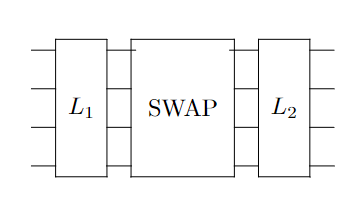



Similarly, the third will be second-correction the the ground state energy and so on. For the sake of clarity, we will briefly go through the third layer. As before, we now partition them into three group 
\begin{equation}
    (1,4);(2,5);(3,6); 
\end{equation}
We use SWAP gate to perform to reessemble the qubit position 
\begin{equation}
    -1-2-3-4-5-6- \xrightarrow{ADJACENT SWAP} -1-4-2-5-3-6-
\end{equation}
We then decoupling these groups 
\begin{equation}
    (1-4) \cdot (2-5) \cdot (3-6)
\end{equation}
as well as additional decoupling that is induced by $H_e$. Since the first layer is already powerful enough, if we just repeat the same layer over and over, we are stuck in the state space generated by the first layer. By introducing a hierachy structure as well as SWAP gates between layers, we expect that we will explore new state spaces that was not captured in the previous layer. To illustrate this, we use the following $ZZX$ spin chain 

\begin{equation}
    H_{ZZX} = \sum_{i} \Big( X_{i} \otimes X_{i+1} + Y_{i} \otimes Y_{i +1} + 0.75 Z_{i} \Big)
\end{equation}


## ZZX spin chain with 5 qubit (our ansatz)

True ground energy -5.986

1 layer: -5.4357 

2 layer, with SWAP layer: -5.8989   , without SWAP: -5.6502 

3 layer, with SWAP layer: -5.96335,   without SWAP: -5.9614



## ZZX spin chain with 5 qubit (2 local ansatz)
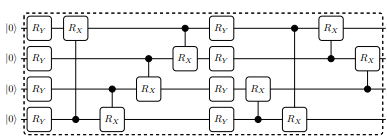

True ground energy -5.986

1 layer: -5.2852 

2 layer, with SWAP layer: -5.5520 

3 layer, with SWAP layer: -5.9431 

## ZZX spin chain with 7 qubit (our ansatz)

True ground energy -8.84783

1 layer: -8.29279 


# $H_2$ Hamiltonian (benchmark)
Here, we compare our ansatz with DQC ansatz for the H_2 Hamiltonian as a benchmark between our ansatz and other DQC ansatz. For small system such as $H_2$, we do not expect that our ansatz could provide better result then DQC ansatz 
\begin{equation}
\begin{aligned}
    H_2 & = (-1.052373245772859  I \otimes I) + (0.39793742484318045  I \otimes Z) -0.39793742484318045  (Z \otimes  I)  \\
    &   -0.01128010425623538  (Z \otimes Z) +  0.18093119978423156 (X \otimes X)
\end{aligned}
\end{equation}

## 1-layer (our ansatz)

True ground state energy: -1.8572750302023822

Numerical simulation: -1.8572708426038762

Noiseless simulation: -1.8567571969731498

Noisy simulation: -1.6685352731305163



## 1-layer (ansatz 16)
   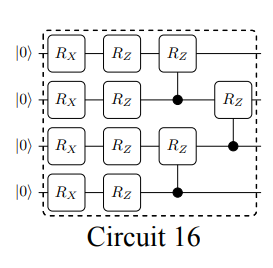
Numerical: -1.83696

Noiseless simulation: -1.83667

Noisy simulation: -1.64316



## 1-layer (ansatz 17)
   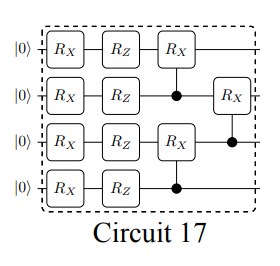

Numerical: -1.85727

Noiseless simulation: -1.85799

Noisy simulation: -1.63825

# ZZX Spin Chain (5 qubit) 
1-layer: Our ansatz 

True ground state enery: -5.9860679774998165

Numerical simulation: -5.454675377379076

Noiseless simulation: -5.138133333333333

Noisy simulation: -3.845703125

# Final remark
As a final remark, we notice that we encountered parameter plateu when increasing the number of optimizing parameter by either increasing number of layers or finding ground state energy for large system. Furthermore, different run could provide wildly different estimated result due to the complicated landscape of the parameter space. 